In [2]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore
from datetime import datetime

In [26]:
df = pd.read_csv("../data/dataset-RedFlags.csv")
df

,Unnamed: 0,ocid,id,initiationType,language,date,tag,title,description,status,...,amount,dateSigned,id_awards,date_awards,amount_awards,currency,budget_id,budget_amount,ruc,Provincia
0,0,ocds-5wno2w-REGES-MPORTO-2021-13-2332,REGES-MPORTO-2021-13-2332-2022-05-07T11:56:24....,tender,es,2022-05-07T07:11:05-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",REGES-MPORTO-2021-13-2332,ESPACIOS DE DIFUSIÓN MASIVA A TRAVÉS DE VALLAS...,complete,...,13392.86,2021-05-31T00:00:00-05:00,4748528-REGES-MPORTO-2021-13,2021-05-07T14:21:51-05:00,13392.86,USD,2021.19.01.A100.150.530207.000.13.01.000.0.000,13392.86,1360000200001,Manabi
1,1,ocds-5wno2w-RE-EEASA-142-2021-3233,RE-EEASA-142-2021-3233-2022-05-10T11:35:00.178...,tender,es,2022-05-10T06:46:51-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",RE-EEASA-142-2021-3233,?SERVICIO DE PAUTAJE EN EL MEDIO DE COMUNICACI...,complete,...,7000.00,2021-10-20T00:00:00-05:00,5104157-RE-EEASA-142-2021,2021-10-15T08:28:28-05:00,7000.00,USD,52202030102120128,7000.00,1890001439001,Tungurahua
2,2,ocds-5wno2w-LICS-UNEMI-013-2021-43664,LICS-UNEMI-013-2021-43664-2022-05-11T11:32:30....,tender,es,2022-05-11T06:48:06-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",LICS-UNEMI-013-2021-43664,CONTRATACION DE POLIZAS DE SEGUROMULTIRIESGO: ...,complete,...,59510.25,2021-06-23T00:00:00-05:00,4720310-LICS-UNEMI-013-2021,2021-04-23T10:25:08-05:00,59510.25,USD,2021.181.0000.0000.82.00.000.002.000.0910.5303...,70005.18,968533430001,Guayas
3,3,ocds-5wno2w-RE-EP-GMJ-DGF-1-2021-102953,RE-EP-GMJ-DGF-1-2021-102953-2022-05-11T11:34:5...,tender,es,2022-05-11T06:48:07-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",RE-EP-GMJ-DGF-1-2021-102953,Elaboración y Adquisición de especiesvaloradas...,complete,...,1700.00,2021-08-02T00:00:00-05:00,4930830-RE-EP-GMJ-DGF-1-2021,2021-07-20T13:49:50-05:00,1700.00,USD,5.3.08.07,1700.00,1360000630001,Manabi
4,4,ocds-5wno2w-LIC-EPFLP-01-2021-404551,LIC-EPFLP-01-2021-404551-2022-05-14T12:25:47.8...,tender,es,2022-05-14T07:33:35-05:00,"[""planning"",""tender"",""award"",""contract""]",LIC-EPFLP-01-2021-404551,CONTRATACIÓN DE LA PÓLIZA DE SEGUROS MARÍTIMOS...,complete,...,749885.00,2021-09-15T00:00:00-05:00,4980937-LIC-EPFLP-01-2021,2021-08-30T08:43:16-05:00,749885.00,USD,5.1.2.02.01,910648.25,1768164300001,Pichincha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,84696,ocds-5wno2w-RE-EPMAPAS-001-2021-279324,RE-EPMAPAS-001-2021-279324-2022-04-28T11:33:29...,tender,es,2022-04-28T06:45:59-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",RE-EPMAPAS-001-2021-279324,CONTRATACION DE PAUTAS COMERCIALES EN EL PROGR...,complete,...,2400.00,2021-08-23T00:00:00-05:00,4992062-RE-EPMAPAS-001-2021,2021-08-18T10:04:49-05:00,2400.00,USD,6.3.02.07,2400.00,968586470001,Guayas
84697,84697,ocds-5wno2w-RE-SC-MDMQ-08-2021-41357,RE-SC-MDMQ-08-2021-41357-2022-04-28T11:30:12.1...,tender,es,2022-04-28T06:45:59-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",RE-SC-MDMQ-08-2021-41357,CONTRATACIÓN DEL SERVICIO COORDINACIÓN Y LOCUC...,complete,...,15600.00,2021-02-18T00:00:00-05:00,4661462-RE-SC-MDMQ-08-2021,2021-02-10T11:27:11-05:00,15.60,USD,730222,15.60,1760003410001,Pichincha
84698,84698,ocds-5wno2w-REOALC-GADMANTA01-21-2668,REOALC-GADMANTA01-21-2668-2022-04-30T12:21:31....,tender,es,2022-04-30T07:28:18-05:00,"[""planning"",""tender"",""award"",""contract""]",REOALC-GADMANTA01-21-2668,"CONTRATACIÓN DEL SERVICIO DE ORGANIZACIÓN, PRO...",complete,...,268000.00,2021-12-22T00:00:00-05:00,5151471-REOALC-GADMANTA01-21,2021-10-28T16:50:25-05:00,268000.00,USD,530205,268000.00,1360000980001,Manabi
84699,84699,ocds-5wno2w-RE-GADMCN-17-21-LRG-67188,RE-GADMCN-17-21-LRG-67188-2022-05-04T11:48:52....,tender,es,2022-05-04T06:51:48-05:00,"[""planning"",""tender"",""award"",""contract""]",RE-GADMCN-17-21-LRG-67188,PRESTACIÓN DE SERVICIOS DE INSPECCIÓN Y MANTEN...,active,...,30590.89,2022-0

In [27]:
df.dtypes

Unnamed: 0                         int64
ocid                              object
id                                object
initiationType                    object
language                          object
date                              object
tag                               object
title                             object
description                       object
status                            object
procuringEntity_id                object
procuringEntity_name              object
value_amount                     float64
value_currency                    object
procurementMethod                 object
procurementMethodDetails          object
numberOfTenderers                float64
tenderPeriod_durationInDays      float64
id_supplier                       object
name                              object
id_contracts                      object
status_contracts                  object
contractPeriod_durationInDays    float64
amount                           float64
dateSigned      

In [28]:
#¿Se puede determinar qué entidades tienen un mayor riesgo de corrupción dentro del periodo de licitación?
##NumberOfTenders
##tenderPeriod_durationInDays
##procurementMethod
###Separar por procurementMethod y los que tengan open como método ver si cumplen la duración y el número de tenders mínimo, sino tiene mayor riesgo de contratación. 

In [44]:
def filtrarEntidades(x: str):
    x = x.upper()
    if "HOSPITAL" in x or "SALUD" in x:
        return "SALUD"
    if "GOBIERNO" in x or "MANCOMUNIDAD" in x or "MUNICIPALIDAD" in x or "GAD" in x or "JUNTA PARROQUIAL" in x or x.startswith("MUNICIPIO"):
        return "MUNICIPIO" 
    if "UNIVERSIDAD" in x or "UNIDAD EDUCATIVA" in x or "ESCUELA" in x or "ESPOL" in x or "ESPE" in x:
        return "EDUCACIÓN"
    if "BOMBEROS" in x:
        return "CUERPO DE BOMBEROS"
    if "AGUA" in x or "ASEO" in x:
        return "EMPRESA PÚBLICA DE AGUA POTABLE"
    if "MOVILIDAD" in x or "VIABILIDAD" in x or "COMISION DE TR" in x or "VIAL" in x or "TRAFF" in x or "TRANSITO" in x:
        return "EMPRESA PÚBLICA DE MOVILIDAD Y TRÁNSITO"
    if x.startswith("EMPRESA EL") or x.startswith("CORPORACION ELECTRICA") or "ELECT" in x or x.startswith("OPERADOR"):
        return "EMPRESA PÚBLICA DE ELECTRICIDAD"
    if "PORTUARIA" in x:
        return "AUTORIDAD PORTUARIA"
    if "COMANDO" in x or "POLIC" in x:
        return "COMANDO POLICIAL"
    if x.startswith("CONSEJO"):
        return "CONSEJO"
    if x.startswith("MINISTERIO") or "MIES" in x:
        return "MINISTERIO"
    if x.startswith("DIRECCI") or "CORTE" in x:
        return "DIRECCIÓN DISTRITAL"
    if "ACCION SOCIAL Y EDUCACION" in x or "CULTURA" in x or "GUAYAQUIL SIGLO XXI" in x:
        return "CULTURAL"
    if "EP PETROECUADOR" in x or "PETRO" in x or "MINA" in x or "MINER" in x:
        return "PETRÓLEO Y MINAS"
    if "ACERIAS" in x or "DIGMAT" in x:
        return "CONTRALORIA"
    if "BANCO" in x or "BANECUA" in x or "FINANCIERA" in x or "FINANZAS" in x or "ECONOMIA" in x:
        return "BANCA, FINANZAS"
    if "ASAMBLEA" in x:
        return "ASAMBLEA"
    if x.startswith("CENTRO"):
        return "CENTRO"
    if x.startswith("CONTRALORIA"):
        return "CONTRALORIA"
    if "DISTRITAL" in x or "DISTRITO" in x:
        return "DIRECCIÓN DISTRITAL"
    if x.startswith("EMPRESA PUBLICA MUNICIPAL"):
        return "EMPRESA PUBLICA MUNICIPAL"
    if "METROPOLITANA" in x:
        return "EMPRESA PUBLICA METROPOLITANA"
    if "TURIS" in x or x.startswith("PARQUE") or x.startswith("MALECON"):
        return "TURISMO"
    if "FEDERACION" in x or "DEPORTIVA" in x or "OLIMPICO" in x:
        return "FEDERACION DEPORTIVA"
    if x.startswith("GOB"):
        return "GOBIERNO"
    if x.startswith("INSTITUTO") or "ISSFA" in x or "IEPS" in x:
        return "INSTITUCIÓN NACIONAL"
    if "PRESID" in x:
        return "PRESIDENCIA"
    if x.startswith("SECRETA"):
        return "SECRETARIA"
    if x.startswith("SERVICIO") or x.startswith("PATRONATO") or x.startswith("REGISTRO") or "MEDIOS" in x:
        return "SERVICIOS"
    if x.startswith("SUPERINTENDENCIA"):
        return "SUPERINTENDENCIA"
    if x.startswith("UNIDAD DE") or "VIGILANCIA" in x or x.startswith("GUARDIA") or "GIR" in x:
        return "UNIDAD DE SEGURIDAD"
    if "RESIDUOS" in x or "AGROPECUARIO" in x or "HIDRO" in x or "AMBIENTAL" in x or "GESTION" in x:
        return "AMBIENTE"
    if "EXPLOCEN" in x or "FAME" in x or "SANTA B" in x or "EMMAIT" in x:
        return "OTRAS EMPRESAS"
    if "TELECOMUNICA" in x:
        return "TELECOMUNICACIONES"
    if "EJERCITO" in x or "CC.FF.AA." in x or "FUERZA TE" in x:
        return "FUERZAS ARMADAS"
    if "MERCADO" in x:
        return "MERCADO"
    if "CONSTRUC" in x or "OBRA" in x or "CEMENT" in x or "CONSTRUYE" in x or "ESTACION" in x:
        return "OBRAS Y CONSTRUCCIONES"
    
    return x

In [45]:
dfOpen = df[df['procurementMethod']=='open']
dfOpen["Licitante"] = dfOpen["procuringEntity_name"].apply(filtrarEntidades)
dfOpen

C:\Users\fioye\AppData\Local\Temp\ipykernel_14072\3158877257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOpen["Licitante"] = dfOpen["procuringEntity_name"].apply(filtrarEntidades)


,Unnamed: 0,ocid,id,initiationType,language,date,tag,title,description,status,...,id_awards,date_awards,amount_awards,currency,budget_id,budget_amount,ruc,Provincia,demoraAdjudicacion,Licitante
2,2,ocds-5wno2w-LICS-UNEMI-013-2021-43664,LICS-UNEMI-013-2021-43664-2022-05-11T11:32:30....,tender,es,2022-05-11T06:48:06-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",LICS-UNEMI-013-2021-43664,CONTRATACION DE POLIZAS DE SEGUROMULTIRIESGO: ...,complete,...,4720310-LICS-UNEMI-013-2021,2021-04-23 15:25:08,59510.25,USD,2021.181.0000.0000.82.00.000.002.000.0910.5303...,70005.18,968533430001,Guayas,60,EDUCACIÓN
4,4,ocds-5wno2w-LIC-EPFLP-01-2021-404551,LIC-EPFLP-01-2021-404551-2022-05-14T12:25:47.8...,tender,es,2022-05-14T07:33:35-05:00,"[""planning"",""tender"",""award"",""contract""]",LIC-EPFLP-01-2021-404551,CONTRATACIÓN DE LA PÓLIZA DE SEGUROS MARÍTIMOS...,complete,...,4980937-LIC-EPFLP-01-2021,2021-08-30 13:43:16,749885.00,USD,5.1.2.02.01,910648.25,1768164300001,Pichincha,15,PETRÓLEO Y MINAS
6,6,ocds-5wno2w-LICS-DD07D03-01-2021-9272,LICS-DD07D03-01-2021-9272-2022-05-21T12:25:37....,tender,es,2022-05-21T07:41:35-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",LICS-DD07D03-01-2021-9272,?CONTRATACIÓN DE PÓLIZA DE SEGUROS EN DIFERENT...,complete,...,4702468-LICS-DD07D03-01-2021,2021-04-01 14:49:32,18602.54,USD,2021.320.1140.0000.90.00.000.001.000.0713.5302...,30003.80,760004920001,El Oro,7,SALUD
7,7,ocds-5wno2w-R2COTBSGSXXI-17-2020-71669,R2COTBSGSXXI-17-2020-71669-2022-05-21T12:34:46...,tender,es,2022-05-21T07:41:36-05:00,"[""planning"",""tender"",""award"",""contract""]",R2COTBSGSXXI-17-2020-71669,Mantenimiento y Reparación De Obras De Regener...,active,...,5035763-R2COTBSGSXXI-17-2020,2021-12-03 21:19:46,361662.55,USD,7.5.05.99,361662.55,992183721001,Guayas,41,CULTURAL
24,24,ocds-5wno2w-LICS-CBSE-001-2021-222424,LICS-CBSE-001-2021-222424-2022-06-15T12:16:30....,tender,es,2022-06-15T07:32:33-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",LICS-CBSE-001-2021-222424,CONTRATACIÓN DE SERVICIO DE SEGUROS DE: VEHÍCU...,complete,...,4680551-LICS-CBSE-001-2021,2021-03-12 21:34:58,7136.16,USD,570201,43008.29,968563340001,Guayas,2,CUERPO DE BOMBEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84673,84673,ocds-5wno2w-LICS-GADMSCP-01-2021-59276,LICS-GADMSCP-01-2021-59276-2022-04-05T11:01:20...,tender,es,2022-04-05T06:07:08-05:00,"[""planning"",""tender"",""award"",""contract""]",LICS-GADMSCP-01-2021-59276,CONTRATACIÓN DE PÓLIZAS DE SEGUROS PARA LOS RA...,complete,...,5169438-LICS-GADMSCP-01-2021,2021-11-10 17:42:18,31451.93,USD,7.7.02.01.01.3.1.2,31874.18,1860000560001,Tungurahua,0,MUNICIPIO
84680,84680,ocds-5wno2w-LICS-CARCHI-001-2021-2481,LICS-CARCHI-001-2021-2481-2022-04-07T11:13:40....,tender,es,2022-04-07T06:23:42-05:00,"[""planning"",""tender"",""award"",""contract""]",LICS-CARCHI-001-2021-2481,CONTRATACIÓN DE SEGUROS MULTIRIESGO GOBIERNO A...,complete,...,4770998-LICS-CARCHI-001-2021,2021-05-21 18:17:54,72994.70,USD,01.01.08.999.007.003.5.57.02.01.000.99.99.99.9...,109967.65,460000130001,Carchi,26,MUNICIPIO
84681,84681,ocds-5wno2w-COTBS-DINAF-01-2021-183518,COTBS-DINAF-01-2021-183518-2022-04-08T11:15:06...,tender,es,2022-04-08T06:28:45-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",COTBS-DINAF-01-2021-183518,"Aprovisionamiento continuo de repuestos,acceso...",complete,...,4865078-COTBS-DINAF-01-2021,2021-07-12 22:22:33,107343.56,USD,2021.052.0004.0000.01.00.000.001.000.1701.5304...,107343.56,1768052340001,Pichincha,10,MUNICIPIO
84685,84685,ocds-5wno2w-COTS-GADMCD-2021-003-94742,COTS-GADMCD-2021-003-94742-2022-04-20T11:17:28...,tender,es,2022-04-20T06:32:52-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",COTS-GADMCD-2021-003-94742,"SERVICIO DE IMPRESIÓN,FOTOCOPIADO Y DIGITALIZA...",complete,...,4703506-COTS-GADMCD-2021-003,2021-04-08 20:01:03,349670.48,USD,530204,349670.48,960001890001,Guayas,20,MUNICIPIO


In [46]:
#media
media = dfOpen[["numberOfTenderers","tenderPeriod_durationInDays"]].mean()
media

numberOfTenderers               4.106185
tenderPeriod_durationInDays    15.445868
dtype: float64

In [91]:
licitacionesMinimas = dfOpen[(dfOpen['numberOfTenderers']<4)|(dfOpen['tenderPeriod_durationInDays']<15)]
#licitacionPorEntidad = licitacionesMinimas.groupby(['Licitante']).agg({'tenderPeriod_durationInDays': ['mean', 'min', 'max','size'], 'numberOfTenderers': ['mean', 'min', 'max']}).sort_values(by=('tenderPeriod_durationInDays','size'),ascending=False).reset_index()
licitacionPorEntidad = licitacionesMinimas.groupby(['Licitante']).agg({'tenderPeriod_durationInDays': ['mean', 'min', 'max','size'], 'numberOfTenderers': ['mean', 'min', 'max']}).reset_index()
licitacionPorEntidad = licitacionPorEntidad.loc[[26,21,17,10,32,18,12,13,11,16]]
licitacionPorEntidad 
##Seguir con el filtro para agrupar todas las entidades.

Licitante tenderPeriod_durationInDays        \
                                                                   mean   min   
26                                MUNICIPIO                   13.685771   9.0   
21                          FUERZAS ARMADAS                   16.100000  11.0   
17          EMPRESA PÚBLICA DE ELECTRICIDAD                   16.593407   9.0   
10                       CUERPO DE BOMBEROS                   15.348485  12.0   
32                                    SALUD                   15.500000   9.0   
18  EMPRESA PÚBLICA DE MOVILIDAD Y TRÁNSITO                   12.309735   9.0   
12                      DIRECCIÓN DISTRITAL                   17.122137   9.0   
13                                EDUCACIÓN                   14.523364   9.0   
11                                 CULTURAL                   19.555556  14.0   
16          EMPRESA PÚBLICA DE AGUA POTABLE                   14.050633   9.0   

               numberOfTenderers             
     max  size              mean  min   max  
26  57.0  1012          1.574111  1.0  20.0  
21  19.0    10          2.700000  1.0   9.0  
17  28.0    91          3.307692  1.0  15.0  
10  22.0   264          2.034091  1.0  11.0  
32  27.0   228          2.267544  1.0  11.0  
18  22.0   226          4.654867  1.0  10.0  
12  25.0   131          2.076336  1.0   8.0  
13  24.0   107          2.457944  1.0  11.0  
11  20.0    72          2.013889  1.0   3.0  
16  23.0    79          1.848101  1.0   6.0

In [92]:
licitacionPorEntidadTotal = dfOpen.groupby(['Licitante']).agg({'tenderPeriod_durationInDays': ['size']}).reset_index()
licitacionPorEntidadTotal=licitacionPorEntidadTotal.loc[[26,21,17,10,32,18,12,13,11,16]]
licitacionPorEntidadTotal

,Licitante,tenderPeriod_durationInDays
,,size
26,MUNICIPIO,72870
21,FUERZAS ARMADAS,2411
17,EMPRESA PÚBLICA DE ELECTRICIDAD,1035
10,CUERPO DE BOMBEROS,276
32,SALUD,262
18,EMPRESA PÚBLICA DE MOVILIDAD Y TRÁNSITO,231
12,DIRECCIÓN DISTRITAL,134
13,EDUCACIÓN,109
11,CULTURAL,96


In [94]:

licitacionPorEntidadTotal['PorcentajeIncumple']= licitacionPorEntidad[('tenderPeriod_durationInDays','size')] / licitacionPorEntidadTotal[('tenderPeriod_durationInDays','size')]  
licitacionPorEntidadTotal=licitacionPorEntidadTotal.sort_values(by=('tenderPeriod_durationInDays','size'),ascending=False)
licitacionPorEntidadTotal= licitacionPorEntidadTotal[(licitacionPorEntidadTotal['PorcentajeIncumple']<1)]

licitacionPorEntidadTotal

,Licitante,tenderPeriod_durationInDays,PorcentajeIncumple
,,size,
26,MUNICIPIO,72870,0.013888
21,FUERZAS ARMADAS,2411,0.004148
17,EMPRESA PÚBLICA DE ELECTRICIDAD,1035,0.087923
10,CUERPO DE BOMBEROS,276,0.956522
32,SALUD,262,0.870229
18,EMPRESA PÚBLICA DE MOVILIDAD Y TRÁNSITO,231,0.978355
12,DIRECCIÓN DISTRITAL,134,0.977612
13,EDUCACIÓN,109,0.981651
11,CULTURAL,96,0.750000


In [57]:
sinMunicipio = licitacionPorEntidad.loc[licitacionPorEntidad['Licitante']!='MUNICIPIO']

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or weight: {a

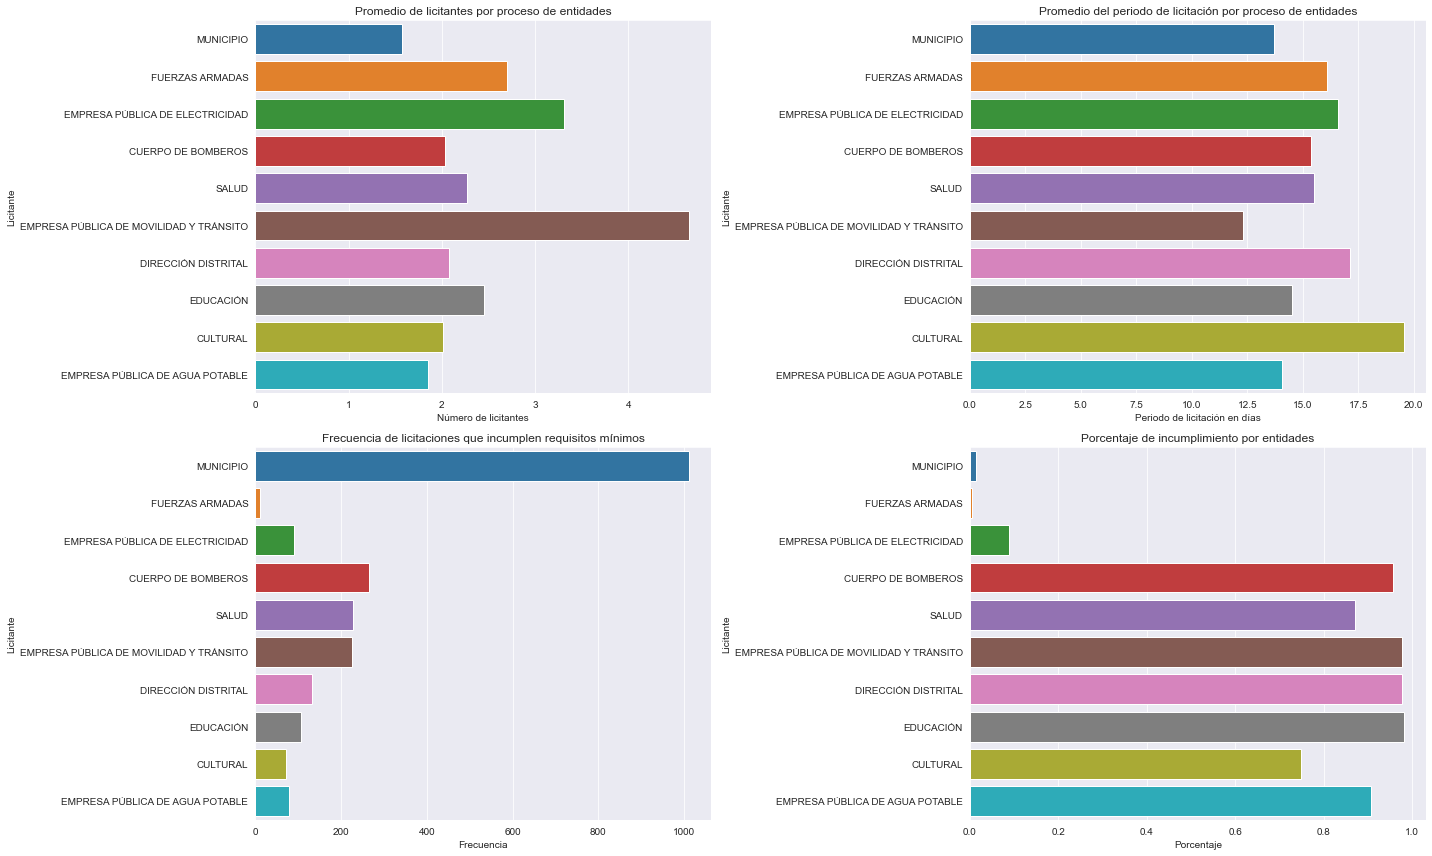

In [101]:
sbn.set_style("darkgrid")
fig,axs = plt.subplots(2,2,figsize=(20,12))
sbn.barplot(data=licitacionPorEntidad, x=("numberOfTenderers","mean"), y="Licitante", ax=axs[0,0])
sbn.barplot(data=licitacionPorEntidad, x=("tenderPeriod_durationInDays","mean"), y="Licitante", ax=axs[0,1])
sbn.barplot(data=licitacionPorEntidad, x=("tenderPeriod_durationInDays","size"), y="Licitante", ax=axs[1,0])
sbn.barplot(data=licitacionPorEntidadTotal, x="PorcentajeIncumple", y="Licitante", ax=axs[1,1])
_ = plt.setp(axs[0,0].set_title("Promedio de licitantes por proceso de entidades"))
_ = plt.setp(axs[0,1].set_title("Promedio del periodo de licitación por proceso de entidades"))
_ = plt.setp(axs[1,0].set_title("Frecuencia de licitaciones que incumplen requisitos mínimos"))
_ = plt.setp(axs[1,1].set_title("Porcentaje de incumplimiento por entidades"))
axs[0,0].set( xlabel = "Número de licitantes")
axs[0,1].set( xlabel = "Periodo de licitación en días")
axs[1,0].set( xlabel = "Frecuencia")
axs[1,1].set( xlabel = "Porcentaje")
fig.tight_layout()

In [10]:
licitacionPorEntidad.to_csv("../data/dataPrueba.csv")

In [231]:
licitacionPorProvincia = dfOpen.groupby(['Provincia']).agg({'tenderPeriod_durationInDays': ['mean', 'min', 'max','size'], 'numberOfTenderers': ['mean', 'min', 'max']}).reset_index()
licitacionPorProvincia

Provincia tenderPeriod_durationInDays              \
                                                          mean   min   max   
0                            Azuay                   17.081250   9.0  28.0   
1                          Bolivar                   17.653846  10.0  22.0   
2                           Carchi                   14.333333   9.0  19.0   
3                            Cañar                   15.137255  12.0  31.0   
4                       Chimborazo                   14.333333  11.0  25.0   
5                         Cotopaxi                   15.538462   9.0  20.0   
6                           El Oro                   10.800000   9.0  27.0   
7                       Esmeraldas                   14.913043  10.0  28.0   
8                        Galapagos                   14.997261  13.0  19.0   
9                           Guayas                   16.815718   9.0  57.0   
10                        Imbabura                   14.453125   9.0  22.0   
11                            Loja                   16.791667   9.0  34.0   
12                        Los Rios                   14.088889   9.0  20.0   
13                          Manabi                   15.576642   9.0  30.0   
14                 Morona Santiago                   16.013889   9.0  20.0   
15                            Napo                   14.495726   9.0  33.0   
16                        Orellana                   14.533333  14.0  15.0   
17                         Pastaza                   15.820513   9.0  19.0   
18                       Pichincha                   24.182434   9.0  34.0   
19                     Santa Elena                   13.500000  12.0  15.0   
20  Santo Domingo de los Tsachilas                   16.571429  14.0  22.0   
21                       Sucumbios                   14.131868  12.0  17.0   
22                      Tungurahua                   16.707483  10.0  24.0   
23                Zamora Chinchipe                   15.863636   9.0  24.0   

          numberOfTenderers             
     size              mean  min   max  
0     160          3.250000  1.0  36.0  
1      78          1.525641  1.0   4.0  
2      12          2.416667  1.0   7.0  
3      51          3.843137  1.0  11.0  
4      93          1.591398  1.0  22.0  
5      65          1.646154  1.0   9.0  
6     425          2.922353  1.0   7.0  
7      23          1.913043  1.0  12.0  
8   71929          3.998457  1.0   4.0  
9     369          3.051491  1.0  18.0  
10     64          1.828125  1.0   7.0  
11     24          2.583333  1.0  11.0  
12     45          2.288889  1.0  11.0  
13    137          2.846715  1.0  29.0  
14     72          2.013889  1.0   6.0  
15    117          1.393162  1.0   9.0  
16     60          1.533333  1.0   2.0  
17    117          1.042735  1.0   4.0  
18   3837          7.073234  1.0  22.0  
19      4          1.250000  1.0   2.0  
20      7          2.285714  1.0   4.0  
21     91          2.043956  1.0   9.0  
22    147          2.292517  1.0  16.0  
23     22          2.681818  1.0   9.0

In [229]:
licitacionPorMetodo = dfOpen.groupby(['procurementMethodDetails']).agg({'tenderPeriod_durationInDays': ['mean', 'min', 'max','size'], 'numberOfTenderers': ['mean', 'min', 'max']}).reset_index()
licitacionPorMetodo

procurementMethodDetails tenderPeriod_durationInDays                     \
                                                  mean   min   max   size   
0               Cotización                   14.971067   9.0  31.0  73100   
1               Licitación                   25.373764  14.0  57.0   3438   
2    Licitación de Seguros                   15.854004  14.0  28.0   1411   

  numberOfTenderers             
               mean  min   max  
0          3.987880  1.0  36.0  
1          7.488656  1.0  15.0  
2          1.993622  1.0   6.0

In [9]:
#¿Se puede determinar los métodos de adquisición que tienen los contratos por provincia y mes? 
#24 Faceted plots (1 por provincia): Lineplot con líneas (por método de adquisición: open, direct, limited, selected)
##Eje x= mes
##Eje y = número contrato
###Provincias
###procurementMethod
###date

In [3]:
dfMasDatos = pd.read_csv("../data/datasetConMasDatos.csv")
dfMasDatos

,Unnamed: 0,ocid,id,initiationType,language,date,tag,title,description,status,...,id_supplier,name,id_contracts,status_contracts,id_awards,amount,currency,budget_id,ruc,Provincia
0,0,ocds-5wno2w-MCBS-DNA-003-2021-178618,MCBS-DNA-003-2021-178618-2022-05-04T11:41:39.8...,tender,es,2022-05-04T06:51:47-05:00,"[""planning"",""tender"",""award"",""contract""]",MCBS-DNA-003-2021-178618,SERVICIO DE MANTENIMIENTO PREVENTIVO Y CORRECT...,complete,...,EC-RUC-1801768969001-886562,SANTAMARIA MARFETAN JORGE VICENTE,2115897-MCBS-DNA-003-2021,terminated,4726509-MCBS-DNA-003-2021,24706.08,USD,2021.052.0003.0000.01.00.000.001.000.1701.5304...,1768040760001,Pichincha
1,1,ocds-5wno2w-LCC-GADMQ-001-2021-2453,LCC-GADMQ-001-2021-2453-2022-05-05T11:49:59.83...,tender,es,2022-05-05T06:56:50-05:00,"[""planning"",""tender"",""award"",""contract""]",LCC-GADMQ-001-2021-2453,FISCALIZACION DE LA CONSTRUCCION DEL PUENTE CA...,complete,...,EC-RUC-0992931647001-816329,MARTINIEV S.A,2092647-LCC-GADMQ-001-2021,terminated,5031904-LCC-GADMQ-001-2021,258933.74,USD,310750105A0000000000021,1260000650001,Los Rios
2,2,ocds-5wno2w-CDC-GADMP-2021-008-45119,CDC-GADMP-2021-008-45119-2022-05-07T11:59:26.4...,tender,es,2022-05-07T07:11:03-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",CDC-GADMP-2021-008-45119,"CONSULTORÍA PARA EL DIAGNÓSTICO, EVALUACIÓN DE...",complete,...,EC-RUC-1311371296001-334723,GARCIA PALMA CARLOS EDUARDO,2094051-CDC-GADMP-2021-008,terminated,5101416-CDC-GADMP-2021-008,2694.00,USD,3.2.0.7.3.06.01.33,560000460001,Cotopaxi
3,3,ocds-5wno2w-REGES-MPORTO-2021-13-2332,REGES-MPORTO-2021-13-2332-2022-05-07T11:56:24....,tender,es,2022-05-07T07:11:05-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",REGES-MPORTO-2021-13-2332,ESPACIOS DE DIFUSIÓN MASIVA A TRAVÉS DE VALLAS...,complete,...,EC-RUC-1310099567001-348867,INTRIAGO MACIAS MARTHA ROSALIA,2073500-REGES-MPORTO-2021-13,terminated,4748528-REGES-MPORTO-2021-13,13392.86,USD,2021.19.01.A100.150.530207.000.13.01.000.0.000,1360000200001,Manabi
4,4,ocds-5wno2w-RE-EEASA-142-2021-3233,RE-EEASA-142-2021-3233-2022-05-10T11:35:00.178...,tender,es,2022-05-10T06:46:51-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",RE-EEASA-142-2021-3233,?SERVICIO DE PAUTAJE EN EL MEDIO DE COMUNICACI...,complete,...,EC-RUC-1891801447001-1015485,INNFOPRESS S.A.S.,2090289-RE-EEASA-142-2021,terminated,5104157-RE-EEASA-142-2021,7000.00,USD,52202030102120128,1890001439001,Tungurahua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155426,155426,ocds-5wno2w-REOALC-GADMANTA01-21-2668,REOALC-GADMANTA01-21-2668-2022-04-30T12:21:31....,tender,es,2022-04-30T07:28:18-05:00,"[""planning"",""tender"",""award"",""contract""]",REOALC-GADMANTA01-21-2668,"CONTRATACIÓN DEL SERVICIO DE ORGANIZACIÓN, PRO...",complete,...,EC-RUC-1313812156001-1040458,YEROVI LOPEZ ROSSYENI MONSERRAT,2115646-REOALC-GADMANTA01-21,terminated,5151471-REOALC-GADMANTA01-21,268000.00,USD,530205,1360000980001,Manabi
155427,155427,ocds-5wno2w-MCBS-DNA-005-2021-178618,MCBS-DNA-005-2021-178618-2022-05-04T11:43:12.1...,tender,es,2022-05-04T06:51:47-05:00,"[""planning"",""tender"",""award"",""contract""]",MCBS-DNA-005-2021-178618,SERVICIO DE MANTENIMIENTO PREVENTIVO Y CORRECT...,complete,...,EC-RUC-0104042445001-559281,NARVAEZ BAHAMONDE JORGE ENRIQUE,2115899-MCBS-DNA-005-2021,terminated,4862272-MCBS-DNA-005-2021,28823.77,USD,2021.052.0003.0000.01.00.000.001.000.1701.5304...,1768040760001,Pichincha
155428,155428,ocds-5wno2w-MCS-CCFFAA-002-ABR21-2539,MCS-CCFFAA-002-ABR21-2539-2022-05-04T11:36:54....,tender,es,2022-05-04T06:51:48-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",MCS-CCFFAA-002-ABR21-2539,CONTRATACIÓN DE UNA AGENCIA DE VIAJES PARA LA ...,complete,...,EC-RUC-1792370027001-408010,SUMAKTOUR TRAVEL & TOURS CIA. LTDA.,2072552-MCS-CCFFAA-002-ABR21,terminated,4744578-MCS-CCFFAA-002-ABR21,7589.29,USD,2021.070.4999.0000.01.00.000.001.000.1701.5303...,1768012630001,Pichincha
15

In [4]:
dfMasDatos.dtypes

Unnamed: 0                    int64
ocid                         object
id                           object
initiationType               object
language                     object
date                         object
tag                          object
title                        object
description                  object
status                       object
procuringEntity_id           object
procuringEntity_name         object
value_amount                float64
value_currency               object
procurementMethod            object
procurementMethodDetails     object
id_supplier                  object
name                         object
id_contracts                 object
status_contracts             object
id_awards                    object
amount                      float64
currency                     object
budget_id                    object
ruc                           int64
Provincia                    object
dtype: object

In [5]:
dfMasDatos['date'] = dfMasDatos['date'].astype("datetime64[ns]")

In [6]:
dfMasDatos['Mes'] = dfMasDatos['date'].dt.month

In [22]:
dfMetodosProvinciasMeses= dfMasDatos.groupby(['Provincia','procurementMethod']).size().unstack(level=1).sort_values(by='open',ascending=False)
dfMetodosProvinciasMeses = dfMetodosProvinciasMeses.fillna(0)
dfMetodosProvinciasMeses

procurementMethod,direct,limited,open,selective
Provincia,,,,
Galapagos,29.0,0.0,71929.0,14.0
Pichincha,1860.0,128.0,3845.0,3552.0
El Oro,424.0,21.0,427.0,61.0
Guayas,1294.0,175.0,376.0,14197.0
Azuay,712.0,39.0,160.0,500.0
Tungurahua,331.0,21.0,147.0,614.0
Manabi,366.0,23.0,137.0,37785.0
Pastaza,184.0,5.0,117.0,27.0
Napo,573.0,15.0,117.0,880.0


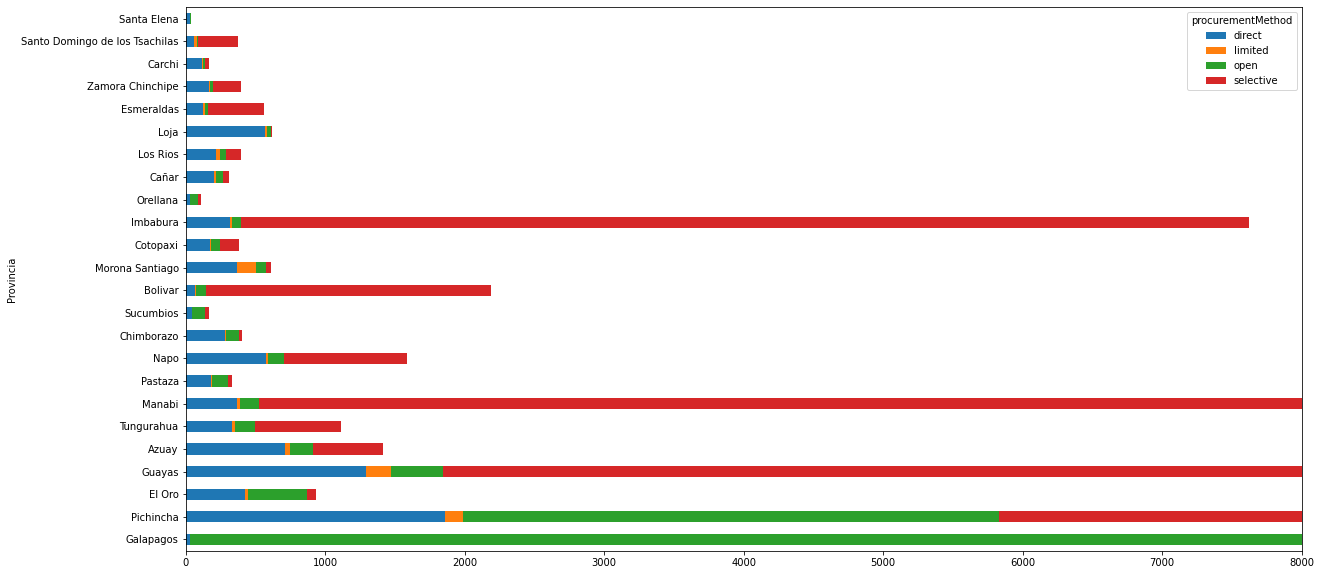

In [23]:
ax=dfMetodosProvinciasMeses.plot.barh(stacked=True,figsize=(20,10),ylabel="Número de contratos").set_xlim(xmin=0, xmax=8000)


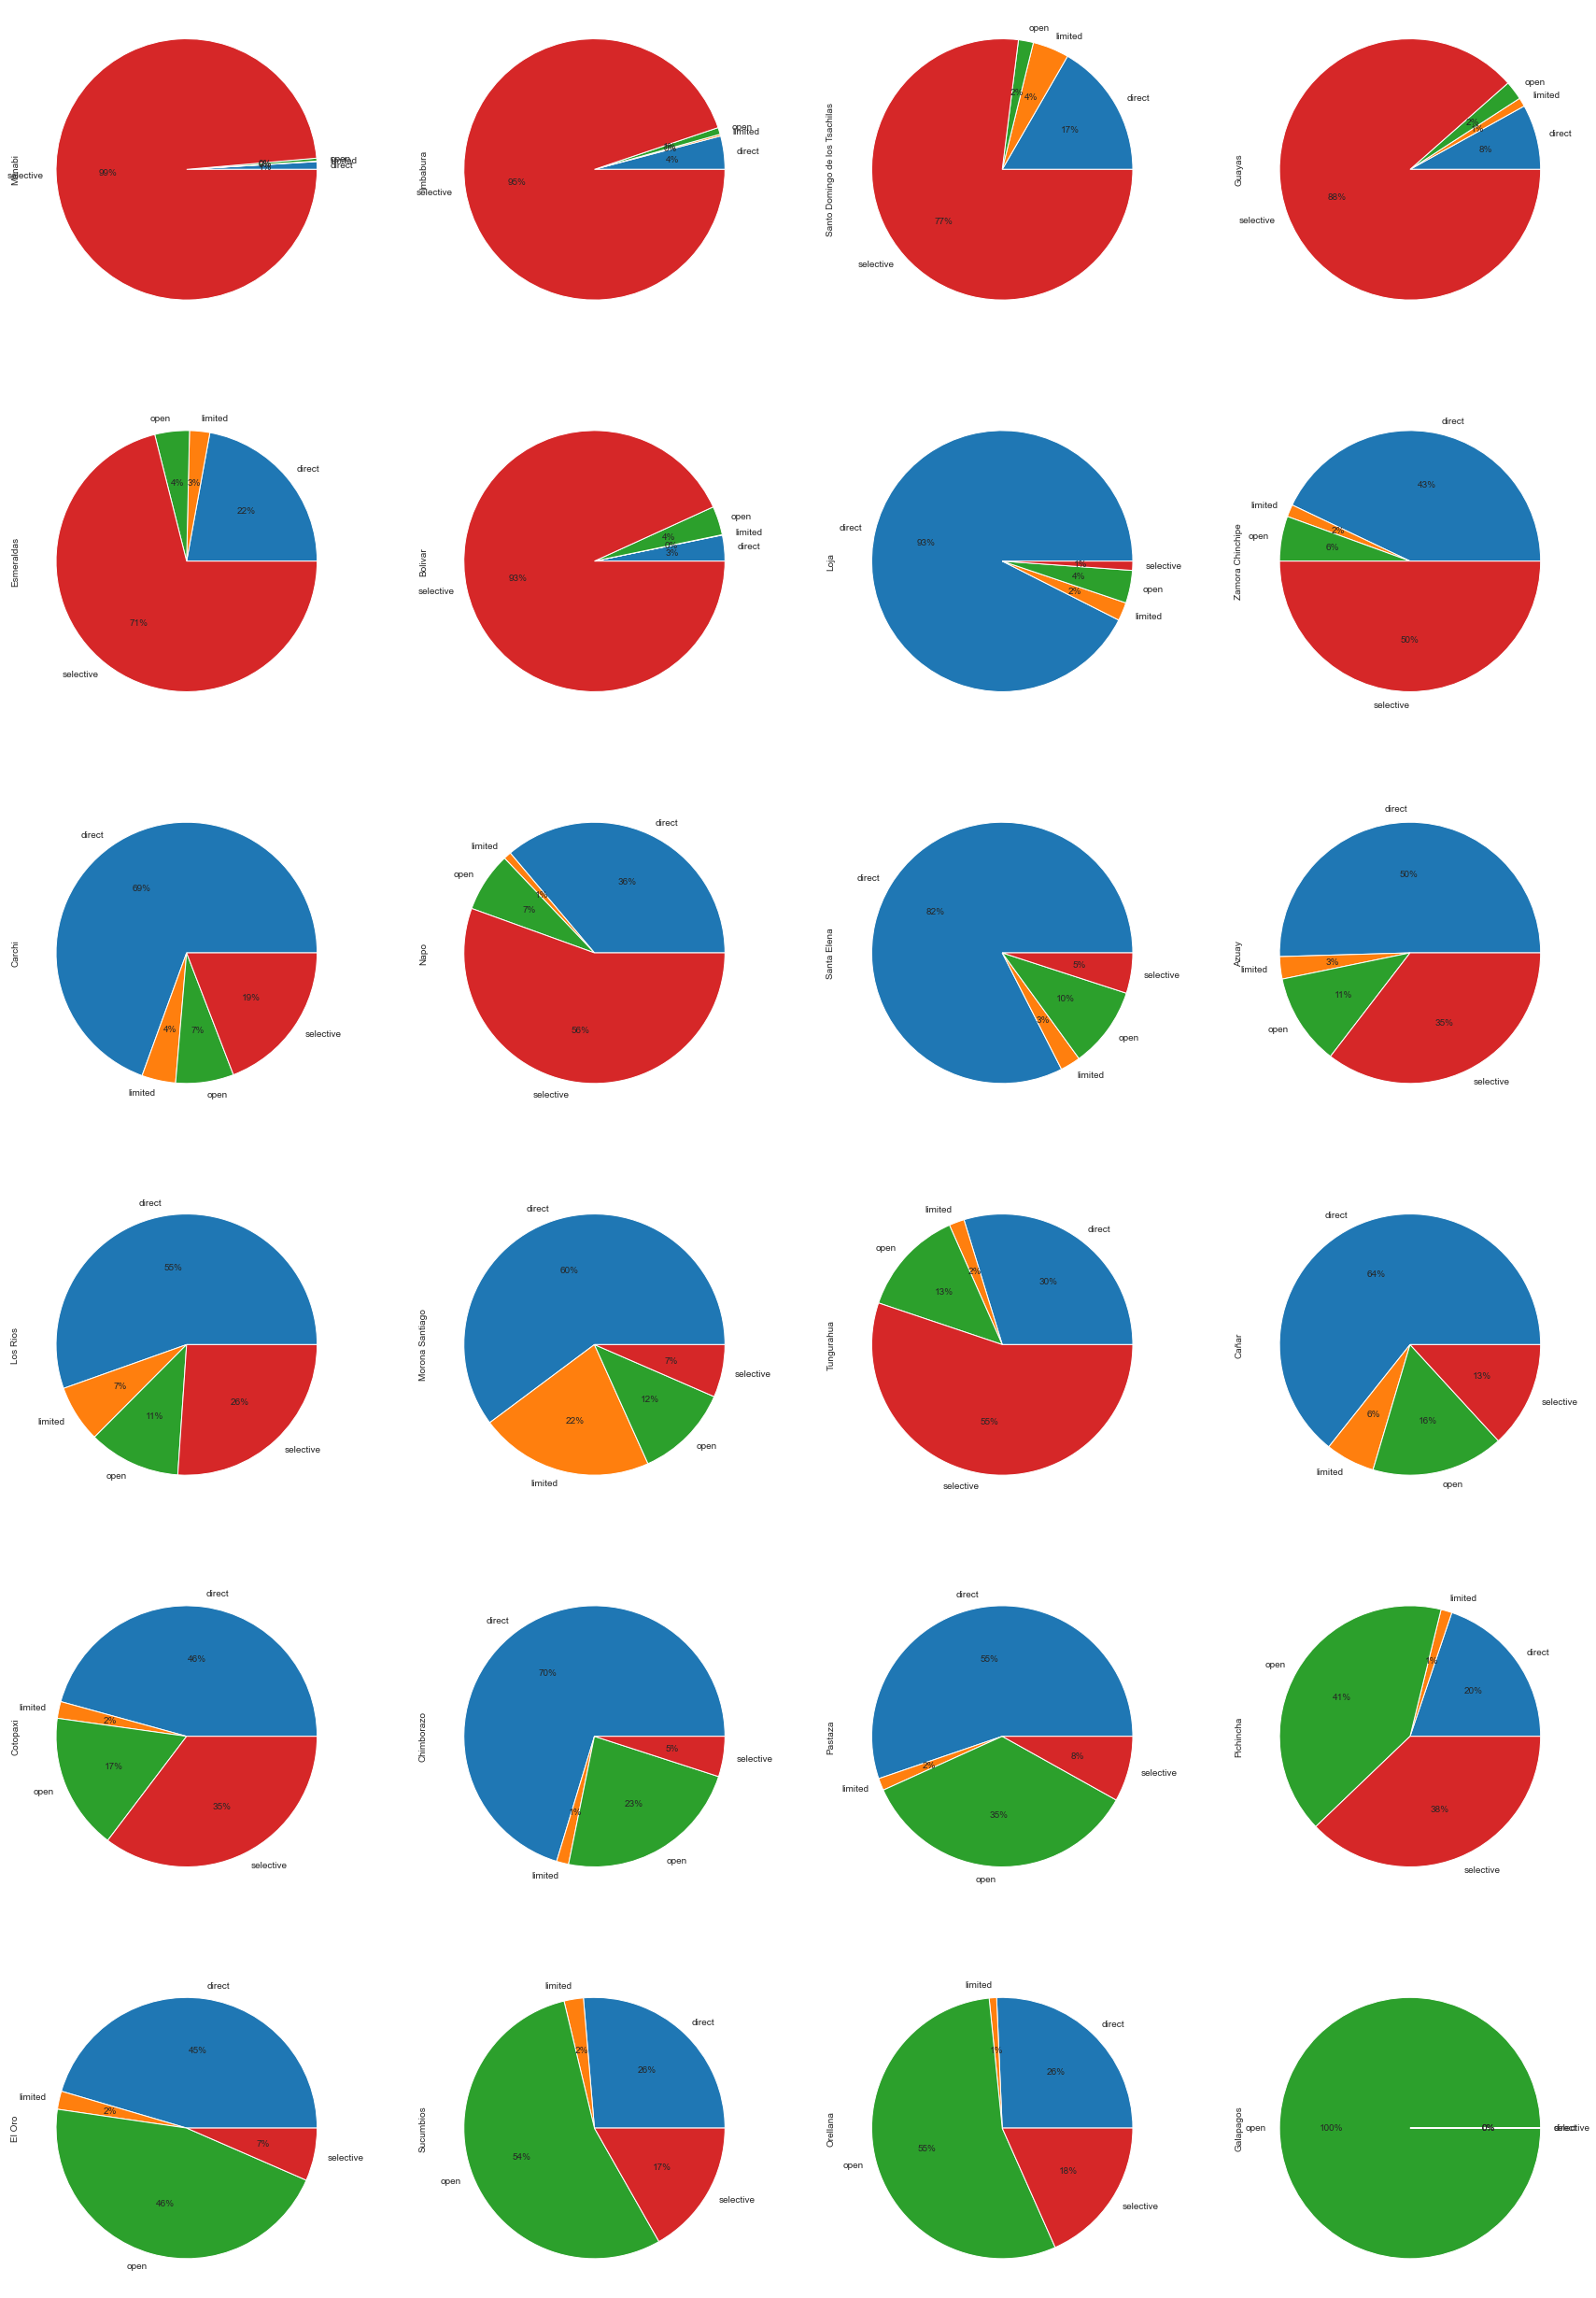

In [109]:
fig,axs = plt.subplots(6,4,figsize=(30,45))
_=dfMetodosProvinciasMeses.loc['Manabi'].plot(kind='pie',ax=axs[0,0],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Imbabura'].plot(kind='pie',ax=axs[0,1],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Santo Domingo de los Tsachilas'].plot(kind='pie',ax=axs[0,2],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Guayas'].plot(kind='pie',ax=axs[0,3],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Esmeraldas'].plot(kind='pie',ax=axs[1,0],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Bolivar'].plot(kind='pie',ax=axs[1,1],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Loja'].plot(kind='pie',ax=axs[1,2],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Zamora Chinchipe'].plot(kind='pie',ax=axs[1,3],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Carchi'].plot(kind='pie',ax=axs[2,0],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Napo'].plot(kind='pie', ax=axs[2,1],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Santa Elena'].plot(kind='pie',ax=axs[2,2],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Azuay'].plot(kind='pie',ax=axs[2,3],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Los Rios'].plot(kind='pie',ax=axs[3,0],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Morona Santiago'].plot(kind='pie', ax=axs[3,1],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Tungurahua'].plot(kind='pie', ax=axs[3,2],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Cañar'].plot(kind='pie',ax=axs[3,3],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Cotopaxi'].plot(kind='pie',ax=axs[4,0],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Chimborazo'].plot(kind='pie',ax=axs[4,1],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Pastaza'].plot(kind='pie', ax=axs[4,2],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Pichincha'].plot(kind='pie', ax=axs[4,3],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['El Oro'].plot(kind='pie',ax=axs[5,0],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Sucumbios'].plot(kind='pie',ax=axs[5,1],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Orellana'].plot(kind='pie',ax=axs[5,2],autopct='%1.0f%%')
_=dfMetodosProvinciasMeses.loc['Galapagos'].plot(kind='pie',ax=axs[5,3],autopct='%1.0f%%')

In [12]:
prueba2= dfMasDatos.groupby(['procurementMethod']).size()
prueba2

procurementMethod
direct        8552
limited        702
open         77968
selective    68209
dtype: int64

<AxesSubplot:title={'center':'TIPOS DE CONTRATACIONES'}, ylabel='None'>

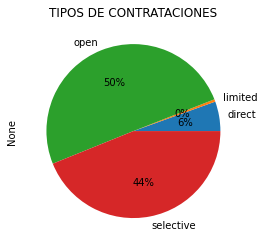

In [16]:
prueba2.plot(kind='pie', title='TIPOS DE CONTRATACIONES',autopct='%1.0f%%')

In [ ]:
#¿Se puede identificar la existencia de una gran demora entre las negociaciones y adjudicaciones de contratos?
##dateSigned
##date_awards
##procuringEntity_name
###Ver diferencia entre las dos fechas y usar un boxplot para ver si existen valores extremos.

In [29]:
df['date_awards'] = df['date_awards'].astype("datetime64[ns]")
df['dateSigned'] = df['dateSigned'].astype("datetime64[ns]")

In [30]:
df['demoraAdjudicacion']= (df['dateSigned'] - df['date_awards']).astype('timedelta64[D]').astype(int)
df

,Unnamed: 0,ocid,id,initiationType,language,date,tag,title,description,status,...,dateSigned,id_awards,date_awards,amount_awards,currency,budget_id,budget_amount,ruc,Provincia,demoraAdjudicacion
0,0,ocds-5wno2w-REGES-MPORTO-2021-13-2332,REGES-MPORTO-2021-13-2332-2022-05-07T11:56:24....,tender,es,2022-05-07T07:11:05-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",REGES-MPORTO-2021-13-2332,ESPACIOS DE DIFUSIÓN MASIVA A TRAVÉS DE VALLAS...,complete,...,2021-05-31 05:00:00,4748528-REGES-MPORTO-2021-13,2021-05-07 19:21:51,13392.86,USD,2021.19.01.A100.150.530207.000.13.01.000.0.000,13392.86,1360000200001,Manabi,23
1,1,ocds-5wno2w-RE-EEASA-142-2021-3233,RE-EEASA-142-2021-3233-2022-05-10T11:35:00.178...,tender,es,2022-05-10T06:46:51-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",RE-EEASA-142-2021-3233,?SERVICIO DE PAUTAJE EN EL MEDIO DE COMUNICACI...,complete,...,2021-10-20 05:00:00,5104157-RE-EEASA-142-2021,2021-10-15 13:28:28,7000.00,USD,52202030102120128,7000.00,1890001439001,Tungurahua,4
2,2,ocds-5wno2w-LICS-UNEMI-013-2021-43664,LICS-UNEMI-013-2021-43664-2022-05-11T11:32:30....,tender,es,2022-05-11T06:48:06-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",LICS-UNEMI-013-2021-43664,CONTRATACION DE POLIZAS DE SEGUROMULTIRIESGO: ...,complete,...,2021-06-23 05:00:00,4720310-LICS-UNEMI-013-2021,2021-04-23 15:25:08,59510.25,USD,2021.181.0000.0000.82.00.000.002.000.0910.5303...,70005.18,968533430001,Guayas,60
3,3,ocds-5wno2w-RE-EP-GMJ-DGF-1-2021-102953,RE-EP-GMJ-DGF-1-2021-102953-2022-05-11T11:34:5...,tender,es,2022-05-11T06:48:07-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",RE-EP-GMJ-DGF-1-2021-102953,Elaboración y Adquisición de especiesvaloradas...,complete,...,2021-08-02 05:00:00,4930830-RE-EP-GMJ-DGF-1-2021,2021-07-20 18:49:50,1700.00,USD,5.3.08.07,1700.00,1360000630001,Manabi,12
4,4,ocds-5wno2w-LIC-EPFLP-01-2021-404551,LIC-EPFLP-01-2021-404551-2022-05-14T12:25:47.8...,tender,es,2022-05-14T07:33:35-05:00,"[""planning"",""tender"",""award"",""contract""]",LIC-EPFLP-01-2021-404551,CONTRATACIÓN DE LA PÓLIZA DE SEGUROS MARÍTIMOS...,complete,...,2021-09-15 05:00:00,4980937-LIC-EPFLP-01-2021,2021-08-30 13:43:16,749885.00,USD,5.1.2.02.01,910648.25,1768164300001,Pichincha,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,84696,ocds-5wno2w-RE-EPMAPAS-001-2021-279324,RE-EPMAPAS-001-2021-279324-2022-04-28T11:33:29...,tender,es,2022-04-28T06:45:59-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",RE-EPMAPAS-001-2021-279324,CONTRATACION DE PAUTAS COMERCIALES EN EL PROGR...,complete,...,2021-08-23 05:00:00,4992062-RE-EPMAPAS-001-2021,2021-08-18 15:04:49,2400.00,USD,6.3.02.07,2400.00,968586470001,Guayas,4
84697,84697,ocds-5wno2w-RE-SC-MDMQ-08-2021-41357,RE-SC-MDMQ-08-2021-41357-2022-04-28T11:30:12.1...,tender,es,2022-04-28T06:45:59-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",RE-SC-MDMQ-08-2021-41357,CONTRATACIÓN DEL SERVICIO COORDINACIÓN Y LOCUC...,complete,...,2021-02-18 05:00:00,4661462-RE-SC-MDMQ-08-2021,2021-02-10 16:27:11,15.60,USD,730222,15.60,1760003410001,Pichincha,7
84698,84698,ocds-5wno2w-REOALC-GADMANTA01-21-2668,REOALC-GADMANTA01-21-2668-2022-04-30T12:21:31....,tender,es,2022-04-30T07:28:18-05:00,"[""planning"",""tender"",""award"",""contract""]",REOALC-GADMANTA01-21-2668,"CONTRATACIÓN DEL SERVICIO DE ORGANIZACIÓN, PRO...",complete,...,2021-12-22 05:00:00,5151471-REOALC-GADMANTA01-21,2021-10-28 21:50:25,268000.00,USD,530205,268000.00,1360000980001,Manabi,54
84699,84699,ocds-5wno2w-RE-GADMCN-17-21-LRG-67188,RE-GADMCN-17-21-LRG-67188-2022-05-04T11:48:52....,tender,es,2022-05-04T06:51:48-05:00,"[""planning"",""tender"",""award"",""contract""]",RE-GADMCN-17-21-LRG-67188,PRESTACIÓN DE SERVICIOS DE INSPECCIÓN Y MANTEN...,active,...,2022-02-11 05:00:00,5302403-RE-GADMCN-17-21-LRG,2022-01-24 22:04:47,30590.89,USD,730404.3613,30590.89,968532700001,Guayas,17


In [31]:
dfNegociaciones=df[df['demoraAdjudicacion']>30]
dfNegociaciones

,Unnamed: 0,ocid,id,initiationType,language,date,tag,title,description,status,...,dateSigned,id_awards,date_awards,amount_awards,currency,budget_id,budget_amount,ruc,Provincia,demoraAdjudicacion
2,2,ocds-5wno2w-LICS-UNEMI-013-2021-43664,LICS-UNEMI-013-2021-43664-2022-05-11T11:32:30....,tender,es,2022-05-11T06:48:06-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",LICS-UNEMI-013-2021-43664,CONTRATACION DE POLIZAS DE SEGUROMULTIRIESGO: ...,complete,...,2021-06-23 05:00:00,4720310-LICS-UNEMI-013-2021,2021-04-23 15:25:08,59510.25,USD,2021.181.0000.0000.82.00.000.002.000.0910.5303...,70005.18,968533430001,Guayas,60
7,7,ocds-5wno2w-R2COTBSGSXXI-17-2020-71669,R2COTBSGSXXI-17-2020-71669-2022-05-21T12:34:46...,tender,es,2022-05-21T07:41:36-05:00,"[""planning"",""tender"",""award"",""contract""]",R2COTBSGSXXI-17-2020-71669,Mantenimiento y Reparación De Obras De Regener...,active,...,2022-01-14 05:00:00,5035763-R2COTBSGSXXI-17-2020,2021-12-03 21:19:46,361662.55,USD,7.5.05.99,361662.55,992183721001,Guayas,41
9,9,ocds-5wno2w-RE-GADIMCD-04-2021-44718,RE-GADIMCD-04-2021-44718-2022-05-26T12:05:18.1...,tender,es,2022-05-26T07:18:28-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",RE-GADIMCD-04-2021-44718,PRODUCCION Y DIFUSION DEL PROGRAMA RADIAL DAUL...,complete,...,2021-09-06 05:00:00,4944021-RE-GADIMCD-04-2021,2021-08-03 20:33:54,17799.95,USD,530207202111003001,17799.95,960000490001,Guayas,33
77,77,ocds-5wno2w-003-RE-GPLR-2021-2805,003-RE-GPLR-2021-2805-2021-11-29T10:45:43.247Z,tender,es,2021-02-22T00:00:00-05:00,"[""planning"",""tender"",""award"",""contract""]",003-RE-GPLR-2021-2805,ACOPIO DE MATERIAL PETREO PARA OBRA EN ETAPA I...,complete,...,2021-05-25 05:00:00,4671214-003-RE-GPLR-2021,2021-04-13 18:29:25,271500.00,USD,75.01.05,271500.00,1260000140001,Los Rios,41
312,312,ocds-5wno2w-COBS-CP4-001-2021-62409,COBS-CP4-001-2021-62409-2022-02-20T09:50:22.81...,tender,es,2022-02-20T05:05:08-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",COBS-CP4-001-2021-62409,“CONTRATACIÓN DE UNA ESTACIÓN DE COMBUSTIBLE ...,complete,...,2021-10-21 05:00:00,4691768-COBS-CP4-001-2021,2021-04-01 14:12:39,164881.03,USD,2021.052.0051.0000.01.00.000.001.000.1301.5308...,165381.03,1360019810001,Manabi,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84632,84632,ocds-5wno2w-LICO-MIMG-041-2021-44856,LICO-MIMG-041-2021-44856-2022-05-28T12:58:42.1...,tender,es,2022-05-28T08:04:52-05:00,"[""planning"",""tender"",""award"",""contract""]",LICO-MIMG-041-2021-44856,MANTENIMIENTO VIAL CON PAV. DE HORMIGÓN ASFÁLT...,active,...,2022-04-08 05:00:00,5213647-LICO-MIMG-041-2021,2022-02-23 21:01:40,1284996.17,USD,750105,1586430.60,960000220001,Guayas,43
84648,84648,ocds-5wno2w-LICO-MIMG-042-2021-44856,LICO-MIMG-042-2021-44856-2022-05-28T12:59:17.6...,tender,es,2022-05-28T08:04:53-05:00,"[""planning"",""tender"",""award"",""contract""]",LICO-MIMG-042-2021-44856,RECONSTRUCCIÓN CON PAVIMENTO DE HORMIGÓN DE CE...,active,...,2022-04-20 05:00:00,5259479-LICO-MIMG-042-2021,2022-03-09 18:47:26,1599868.30,USD,750105,1880984.85,960000220001,Guayas,41
84662,84662,ocds-5wno2w-RE-GADPO-OP-69-2021-29112,RE-GADPO-OP-69-2021-29112-2022-03-24T10:52:23....,tender,es,2022-03-24T05:55:53-05:00,"[""planning"",""tender"",""award"",""contract""]",RE-GADPO-OP-69-2021-29112,"SERVICIO DE MANTENIMIENTO CORRECTIVO, QUE INCL...",active,...,2022-02-21 05:00:00,5289310-RE-GADPO-OP-69-2021,2021-12-30 17:06:37,58563.50,USD,22.01.701.036.00.00.7.73.04.04.000.004.0000.00...,58563.50,1560002480001,Napo,52
84668,84668,ocds-5wno2w-COTS_CNTEP_115600-21-236009,COTS_CNTEP_115600-21-236009-2022-03-29T10:39:2...,tender,es,2022-03-29T05:50:01-05:00,"[""planning"",""tender"",""award"",""contract""]",COTS_CNTEP_115600-21-236009,PRESTACIÓN DE SERVICIOS DE TRANSPORTE DE CARGA...,complete,...,2021-12-15 05:00:00,4709230-COTS_CNTEP_115600-21,2021-05-17 23:09:22,429502.32,USD,20005,429502.32,1768152560001,Pichincha,211


In [32]:
dfNegociaciones.dtypes

Unnamed: 0                                int64
ocid                                     object
id                                       object
initiationType                           object
language                                 object
date                                     object
tag                                      object
title                                    object
description                              object
status                                   object
procuringEntity_id                       object
procuringEntity_name                     object
value_amount                            float64
value_currency                           object
procurementMethod                        object
procurementMethodDetails                 object
numberOfTenderers                       float64
tenderPeriod_durationInDays             float64
id_supplier                              object
name                                     object
id_contracts                            

In [33]:
negociacionesMaypor30 = dfNegociaciones.groupby(['procurementMethod']).agg({'demoraAdjudicacion': ['mean', 'min', 'max','size']}).sort_values(by=('demoraAdjudicacion','size')).reset_index()
negociacionesMaypor30

procurementMethod demoraAdjudicacion              
                                  mean min  max size
0           limited          47.000000  36   58    2
1            direct          53.896226  31  381  106
2              open          56.034483  31  268  116

In [34]:
def filtrar(x: str):
    x = x.upper()
    if "HOSPITAL" in x:
        return "HOSPITAL"
    if "GOBIERNO" in x or "MANCOMUNIDAD" in x or "MUNICIPALIDAD" in x or "GAD" in x or "JUNTA PARROQUIAL" in x:
        return "MUNICIPIO" 
    if "UNIVERSIDAD" in x:
        return "UNIVERSIDAD"
    if "ESCUELA" in x:
        return "UNIVERSIDAD"
    if "BOMBEROS" in x:
        return "CUERPO DE BOMBEROS"
    if "AGUA" in x:
        return "EMPRESA PÚBLICA DE AGUA POTABLE"
    if "MOVILIDAD" in x:
        return "EMPRESA PÚBLICA DE MOBILIDAD Y TRÁNSITO"
    if x.startswith("EMPRESA EL") or x.startswith("CORPORACION ELECTRICA"):
        return "EMPRESA PÚBLICA DE ELECTRICIDAD"
    if x.startswith("AUTORIDAD"):
        return "AUTORIDAD PORTUARIA"
    if "COMANDO" in x or "POLICIA" in x:
        return "COMANDO POLICIAL"
    if x.startswith("CONSEJO"):
        return "CONSEJO"
    if x.startswith("MINISTERIO"):
        return "MINISTERIO"
    if x.startswith("DIRECCION"):
        return "DIRECCIÓN DISTRITAL"
    if "ACCION SOCIAL Y EDUCACION" in x or "CULTURA" in x or "GUAYAQUIL SIGLO XXI" in x:
        return "CULTURAL"
    if "EP PETROECUADOR" in x:
        return "EP PETROECUADOR"
    if "ACERIAS" in x or "DIGMAT" in x:
        return "CONTRALORIA"
    return x

In [35]:
dfNegociaciones["Licitante"] = dfNegociaciones["procuringEntity_name"].apply(filtrar)
dfNegociaciones

C:\Users\fioye\AppData\Local\Temp\ipykernel_14072\3501363866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNegociaciones["Licitante"] = dfNegociaciones["procuringEntity_name"].apply(filtrar)


,Unnamed: 0,ocid,id,initiationType,language,date,tag,title,description,status,...,id_awards,date_awards,amount_awards,currency,budget_id,budget_amount,ruc,Provincia,demoraAdjudicacion,Licitante
2,2,ocds-5wno2w-LICS-UNEMI-013-2021-43664,LICS-UNEMI-013-2021-43664-2022-05-11T11:32:30....,tender,es,2022-05-11T06:48:06-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",LICS-UNEMI-013-2021-43664,CONTRATACION DE POLIZAS DE SEGUROMULTIRIESGO: ...,complete,...,4720310-LICS-UNEMI-013-2021,2021-04-23 15:25:08,59510.25,USD,2021.181.0000.0000.82.00.000.002.000.0910.5303...,70005.18,968533430001,Guayas,60,UNIVERSIDAD
7,7,ocds-5wno2w-R2COTBSGSXXI-17-2020-71669,R2COTBSGSXXI-17-2020-71669-2022-05-21T12:34:46...,tender,es,2022-05-21T07:41:36-05:00,"[""planning"",""tender"",""award"",""contract""]",R2COTBSGSXXI-17-2020-71669,Mantenimiento y Reparación De Obras De Regener...,active,...,5035763-R2COTBSGSXXI-17-2020,2021-12-03 21:19:46,361662.55,USD,7.5.05.99,361662.55,992183721001,Guayas,41,CULTURAL
9,9,ocds-5wno2w-RE-GADIMCD-04-2021-44718,RE-GADIMCD-04-2021-44718-2022-05-26T12:05:18.1...,tender,es,2022-05-26T07:18:28-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",RE-GADIMCD-04-2021-44718,PRODUCCION Y DIFUSION DEL PROGRAMA RADIAL DAUL...,complete,...,4944021-RE-GADIMCD-04-2021,2021-08-03 20:33:54,17799.95,USD,530207202111003001,17799.95,960000490001,Guayas,33,MUNICIPIO
77,77,ocds-5wno2w-003-RE-GPLR-2021-2805,003-RE-GPLR-2021-2805-2021-11-29T10:45:43.247Z,tender,es,2021-02-22T00:00:00-05:00,"[""planning"",""tender"",""award"",""contract""]",003-RE-GPLR-2021-2805,ACOPIO DE MATERIAL PETREO PARA OBRA EN ETAPA I...,complete,...,4671214-003-RE-GPLR-2021,2021-04-13 18:29:25,271500.00,USD,75.01.05,271500.00,1260000140001,Los Rios,41,MUNICIPIO
312,312,ocds-5wno2w-COBS-CP4-001-2021-62409,COBS-CP4-001-2021-62409-2022-02-20T09:50:22.81...,tender,es,2022-02-20T05:05:08-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",COBS-CP4-001-2021-62409,“CONTRATACIÓN DE UNA ESTACIÓN DE COMBUSTIBLE ...,complete,...,4691768-COBS-CP4-001-2021,2021-04-01 14:12:39,164881.03,USD,2021.052.0051.0000.01.00.000.001.000.1301.5308...,165381.03,1360019810001,Manabi,202,COMANDO POLICIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84632,84632,ocds-5wno2w-LICO-MIMG-041-2021-44856,LICO-MIMG-041-2021-44856-2022-05-28T12:58:42.1...,tender,es,2022-05-28T08:04:52-05:00,"[""planning"",""tender"",""award"",""contract""]",LICO-MIMG-041-2021-44856,MANTENIMIENTO VIAL CON PAV. DE HORMIGÓN ASFÁLT...,active,...,5213647-LICO-MIMG-041-2021,2022-02-23 21:01:40,1284996.17,USD,750105,1586430.60,960000220001,Guayas,43,MUNICIPIO
84648,84648,ocds-5wno2w-LICO-MIMG-042-2021-44856,LICO-MIMG-042-2021-44856-2022-05-28T12:59:17.6...,tender,es,2022-05-28T08:04:53-05:00,"[""planning"",""tender"",""award"",""contract""]",LICO-MIMG-042-2021-44856,RECONSTRUCCIÓN CON PAVIMENTO DE HORMIGÓN DE CE...,active,...,5259479-LICO-MIMG-042-2021,2022-03-09 18:47:26,1599868.30,USD,750105,1880984.85,960000220001,Guayas,41,MUNICIPIO
84662,84662,ocds-5wno2w-RE-GADPO-OP-69-2021-29112,RE-GADPO-OP-69-2021-29112-2022-03-24T10:52:23....,tender,es,2022-03-24T05:55:53-05:00,"[""planning"",""tender"",""award"",""contract""]",RE-GADPO-OP-69-2021-29112,"SERVICIO DE MANTENIMIENTO CORRECTIVO, QUE INCL...",active,...,5289310-RE-GADPO-OP-69-2021,2021-12-30 17:06:37,58563.50,USD,22.01.701.036.00.00.7.73.04.04.000.004.0000.00...,58563.50,1560002480001,Napo,52,MUNICIPIO
84668,84668,ocds-5wno2w-COTS_CNTEP_115600-21-236009,COTS_CNTEP_115600-21-236009-2022-03-29T10:39:2...,tender,es,2022-03-29T05:50:01-05:00,"[""planning"",""tender"",""award"",""contract""]",COTS_CNTEP_115600-21-236009,PRESTACIÓN DE SERVICIOS DE TRANSPORTE DE CARGA...,complete,...,4709230-COTS_CNTEP_115600-21,2021-05-17 23:09:22,429502.32,USD,20005,429502.32,1768152560001,Pichincha,211,CORPORACION NACIONAL DE TELECOMUNICACIONES


In [38]:
negociacionesdetalleMaypor30 = dfNegociaciones.groupby(['Licitante']).agg({'demoraAdjudicacion': ['mean', 'min', 'max','size']}).sort_values(by=("demoraAdjudicacion","size"),ascending=False).reset_index()
negociacionesdetalleMaypor30=negociacionesdetalleMaypor30.loc[:7]

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or weight: {a

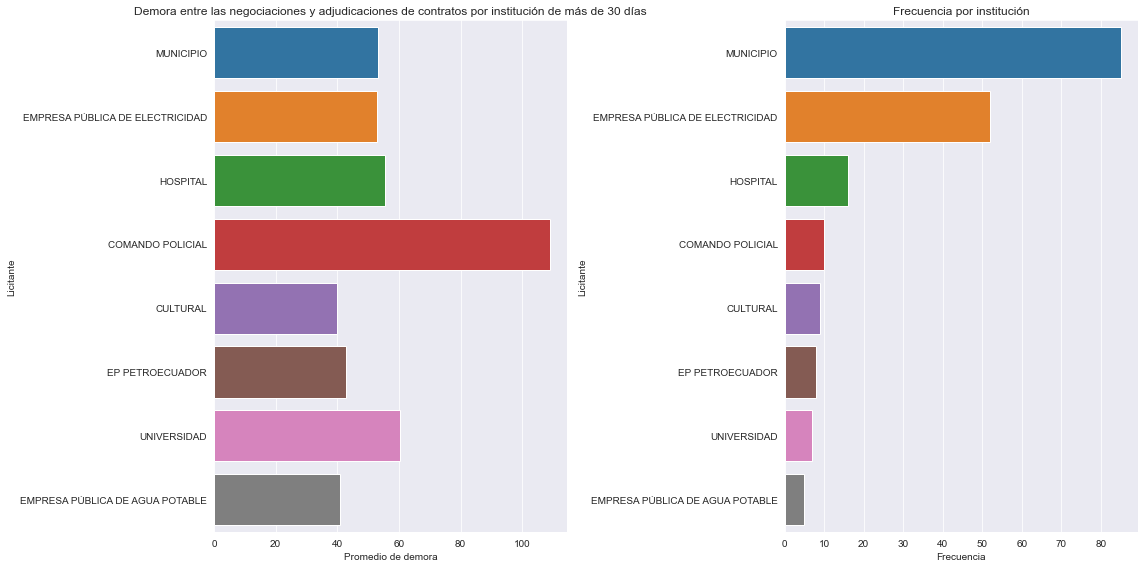

In [42]:
sbn.set_style("darkgrid")
fig,axs = plt.subplots(1,2,figsize=(16,8))
sbn.barplot(data=negociacionesdetalleMaypor30, x=("demoraAdjudicacion","mean"), y="Licitante", ax=axs[0])
sbn.barplot(data=negociacionesdetalleMaypor30, x=("demoraAdjudicacion","size"), y="Licitante", ax=axs[1])
_ = plt.setp(axs[0].set_title("Demora entre las negociaciones y adjudicaciones de contratos por institución de más de 30 días"))
_ = plt.setp(axs[1].set_title("Frecuencia por institución"))
axs[0].set( xlabel = "Promedio de demora")
axs[1].set( xlabel = "Frecuencia")
fig.tight_layout()